<h1 align="center">Fase 1 - Data Analysis and Exploration</h1>

## Módulo 01 - Análise Exploratória de Dados

### Aula 1 - Aquisição e Leitura de Dados Reais

#### 1. Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:

* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e operações matemáticas.
* **Matplotlib**: para visualização dos dados.
* **Seaborn**: para visualização dos dados.


In [3]:
# Importar bibliotecas
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns



#### 2. Aquisição dos dados

Os dados utilizados nesta análise foram obtidos a partir do site [DATASUS](https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/), que contém informações sobre os valores processados para internações hospitalares. Este conjunto de dados reflete os custos consolidados após o processamento e validação dos atendimentos, oferecendo uma perspectiva mais finalizada e precisa dos gastos hospitalares. A análise desses dados permite uma avaliação detalhada da eficiência e eficácia do uso dos recursos, uma vez que os valores são ajustados e confirmados após a verificação dos atendimentos.

##### 2.1 Ajuste da Apresentação dos Dados
Para adequar a apresentação dos dados ao padrão brasileiro, onde a vírgula é usada como separador decimal e o ponto como separador de milhar, foi necessário ajustar a formatação de exibição dos valores numéricos. Em Python, por padrão, os números flutuantes são exibidos com o ponto como separador decimal. Para melhorar a legibilidade dos dados e adequar-se às convenções locais, foi utilizado o seguinte código:


In [4]:
# Corrigir o caminho para subir um nível na estrutura de diretórios antes de acessar 'data/raw'
file_path = os.path.join('..', '..', 'data', 'raw', 'sih_cnv_qiuf201633177_212_141_162.csv')

# Carregar o DataFrame a partir do CSV localizado no diretório 'raw'
df_processamento = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=3, sep=';', 
                               thousands='.', decimal=',', skipfooter=12, engine='python')


# Ajuste da apresentação dos dados para exibir vírgula como separador decimal
pd.options.display.float_format = lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Exibir as primeiras linhas
df_processamento.head()


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,11 Rondônia,"1.388.528,39","2.931.283,42","1.541.682,52","1.525.314,96","1.645.953,84","1.406.150,68","3.065.279,01","3.231.494,61","3.117.178,63",...,"12.090.863,69","11.561.002,61","10.250.749,74","12.809.153,73","11.368.435,62","12.578.152,13","11.559.993,57","11.828.541,38","1.968.819,10","1.446.704.922,33"
1,12 Acre,"902.416,00","1.497.206,26","1.794.028,48","1.730.469,42","1.819.443,92","1.828.496,00","2.511.754,59","2.089.107,14","2.275.708,53",...,"4.150.926,64","5.712.687,05","3.503.827,09","4.308.072,76","4.092.197,71","4.819.515,84","5.560.094,15","4.374.108,09","4.484.207,99","615.416.604,48"
2,13 Amazonas,"4.735.529,42","7.118.990,57","8.196.635,49","8.259.378,42","7.831.399,90","8.477.273,62","9.368.858,72","9.352.532,70","9.363.099,35",...,"19.769.519,55","18.947.549,58","14.854.015,59","16.457.165,86","20.939.458,81","23.350.848,79","23.226.650,33","22.959.304,30","21.291.999,69","2.728.085.655,80"
3,14 Roraima,"657.889,53","777.939,31","718.688,03","839.994,39","862.347,96","832.440,66","996.693,09","894.271,18","910.424,17",...,"2.443.674,72","3.795.465,55","2.944.423,63","2.983.752,53","3.160.891,68","2.654.012,71","2.321.224,13","2.548.379,72","2.598.375,67","467.066.312,33"
4,15 Pará,"18.864.744,11","19.553.758,20","21.937.342,70","20.842.829,69","23.249.952,88","23.240.687,56","24.002.223,56","23.341.218,03","25.172.261,32",...,"50.894.073,84","55.893.962,12","56.122.128,80","48.831.607,14","50.654.355,78","53.972.497,56","53.473.198,11","52.370.302,43","48.365.091,56","6.589.319.524,97"


#### 3. Verificação dos Dados
Nesta etapa, foi realizada uma inspeção minuciosa do dataset para assegurar sua integridade e qualidade antes de prosseguir com a análise. A verificação dos dados inclui:

- **Exploração Inicial:** Leitura do dataset para entender a estrutura dos dados, as variáveis disponíveis e o volume de registros.
- **Validação de Consistência:** Verificação de inconsistências, como valores ausentes, duplicações e anomalias que possam impactar a análise.
- **Sumarização Estatística:** Geração de estatísticas descritivas das variáveis para obter uma visão geral das distribuições e identificar possíveis outliers.


In [ ]:
#Leitura dos dados para entender sua estrutura
df_processamento

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,11 Rondônia,"1.388.528,39","2.931.283,42","1.541.682,52","1.525.314,96","1.645.953,84","1.406.150,68","3.065.279,01","3.231.494,61","3.117.178,63",...,"12.090.863,69","11.561.002,61","10.250.749,74","12.809.153,73","11.368.435,62","12.578.152,13","11.559.993,57","11.828.541,38","1.968.819,10","1.446.704.922,33"
1,12 Acre,"902.416,00","1.497.206,26","1.794.028,48","1.730.469,42","1.819.443,92","1.828.496,00","2.511.754,59","2.089.107,14","2.275.708,53",...,"4.150.926,64","5.712.687,05","3.503.827,09","4.308.072,76","4.092.197,71","4.819.515,84","5.560.094,15","4.374.108,09","4.484.207,99","615.416.604,48"
2,13 Amazonas,"4.735.529,42","7.118.990,57","8.196.635,49","8.259.378,42","7.831.399,90","8.477.273,62","9.368.858,72","9.352.532,70","9.363.099,35",...,"19.769.519,55","18.947.549,58","14.854.015,59","16.457.165,86","20.939.458,81","23.350.848,79","23.226.650,33","22.959.304,30","21.291.999,69","2.728.085.655,80"
3,14 Roraima,"657.889,53","777.939,31","718.688,03","839.994,39","862.347,96","832.440,66","996.693,09","894.271,18","910.424,17",...,"2.443.674,72","3.795.465,55","2.944.423,63","2.983.752,53","3.160.891,68","2.654.012,71","2.321.224,13","2.548.379,72","2.598.375,67","467.066.312,33"
4,15 Pará,"18.864.744,11","19.553.758,20","21.937.342,70","20.842.829,69","23.249.952,88","23.240.687,56","24.002.223,56","23.341.218,03","25.172.261,32",...,"50.894.073,84","55.893.962,12","56.122.128,80","48.831.607,14","50.654.355,78","53.972.497,56","53.473.198,11","52.370.302,43","48.365.091,56","6.589.319.524,97"
5,16 Amapá,"1.120.973,34","1.268.740,33","974.651,24","1.141.137,32","866.346,18","1.440.978,95","1.426.659,48","1.475.551,38","1.651.341,43",...,"3.361.503,59","3.159.644,32","4.021.077,83","3.961.035,17","4.339.815,79","3.580.261,72","3.880.761,58","4.271.287,44","4.114.870,26","454.244.659,82"
6,17 Tocantins,"3.441.592,69","4.985.688,85","6.205.612,60","4.984.482,09","5.511.002,46","4.927.934,22","5.445.602,28","5.413.710,38","5.596.669,50",...,"9.147.983,05","8.620.368,58","10.077.271,68","9.154.050,66","9.456.833,56","9.320.543,87","10.713.160,33","10.165.573,82","10.774.197,65","1.423.360.586,79"
7,21 Maranhão,"10.723.506,39","13.559.679,41","13.985.142,36","14.809.416,46","14.505.727,38","14.908.091,32","15.784.899,40","15.195.312,89","14.951.277,75",...,"40.201.590,65","43.778.258,41","42.103.834,07","42.008.702,63","40.055.849,81","45.800.973,94","42.785.118,16","42.220.107,38","40.953.254,49","5.464.095.395,44"
8,22 Piauí,"7.985.142,43","10.079.928,25","10.298.372,45","10.775.976,33","10.398.360,88","10.528.253,88","11.040.107,92","10.549.176,40","10.899.198,97",...,"22.561.682,28","23.220.140,98","21.718.829,69","21.747.464,68","21.187.447,64","22.390.166,31","24.610.558,49","22.629.745,72","20.691.413,90","3.168.311.617,59"
9,23 Ceará,"15.539.821,90","25.735.101,55","28.724.625,75","30.676.457,06","30.604.453,47","31.272.395,18","30.925.391,36","27.851.438,72","30.362.719,90",...,"66.979.655,16","67.065.718,96","63.795.717,97","65.748.315,45","61.990.582,25","65.723.307,73","73.181.947,27","73.130.934,93","68.706.411,92","9.201.831.945,25"


In [ ]:
# Verificar estrutura do dataframe
df_processamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 200 entries, Unidade da Federação to Total
dtypes: float64(198), object(2)
memory usage: 42.3+ KB


In [ ]:
# Analisndo os tipos de dados por coluna
df_processamento.dtypes

Unidade da Federação     object
2008/Jan                float64
2008/Fev                float64
2008/Mar                float64
2008/Abr                float64
                         ...   
2024/Mar                float64
2024/Abr                float64
2024/Mai                float64
2024/Jun                float64
Total                   float64
Length: 200, dtype: object

In [ ]:
# Selecionar colunas do tipo object
object_columns = df_processamento.select_dtypes(include=['object']).columns
print(object_columns)


Index(['Unidade da Federação', '2009/Set'], dtype='object')


In [ ]:
# Vereficando porque a coluna '2009/Set' não é do tipo numérico
df_processamento['2009/Set'].to_frame()

,2009/Set
0,3605007.43
1,-
2,9730634.16
3,1701611.25
4,27967969.22
5,2034329.78
6,6542918.14
7,19722895.51
8,12247027.29
9,34471579.06


In [ ]:
# Verificar valores nulos
df_processamento.isnull().sum()

Unidade da Federação    0
2008/Jan                0
2008/Fev                0
2008/Mar                0
2008/Abr                0
                       ..
2024/Mar                0
2024/Abr                0
2024/Mai                0
2024/Jun                0
Total                   0
Length: 200, dtype: int64

In [ ]:
# Verificando valores duplicados
df_processamento.duplicated().sum()



np.int64(0)

In [ ]:
# Sumário estatístico
df_processamento.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
count,"27,00","27,00","27,00","27,00","27,00","27,00","27,00","27,00","27,00","27,00",...,"27,00","27,00","27,00","27,00","27,00","27,00","27,00","27,00","27,00","27,00"
mean,"15.126.846,64","22.710.158,12","24.594.187,35","25.431.957,83","26.511.245,91","27.858.576,43","28.332.973,51","27.800.320,31","27.887.505,26","27.148.854,29",...,"67.003.447,62","65.917.439,64","66.041.383,95","66.839.859,15","65.671.065,26","70.797.784,92","72.218.520,27","72.584.793,40","70.181.204,76","8.933.463.602,22"
std,"19.159.188,30","30.879.444,07","32.516.725,69","33.339.066,25","37.540.771,63","38.676.893,04","39.292.968,91","37.748.913,80","38.226.540,65","36.671.387,56",...,"83.365.130,34","80.807.944,72","82.724.882,47","83.721.873,38","83.924.518,09","90.428.503,39","90.150.280,97","92.618.794,45","89.608.752,13","11.776.694.949,65"
min,"657.889,53","777.939,31","718.688,03","839.994,39","862.347,96","832.440,66","996.693,09","894.271,18","910.424,17","1.191.770,32",...,"2.443.674,72","3.159.644,32","2.944.423,63","2.983.752,53","3.160.891,68","2.654.012,71","2.321.224,13","2.548.379,72","1.968.819,10","454.244.659,82"
25%,"4.740.724,30","7.060.731,59","8.041.439,31","8.526.744,11","8.531.522,65","9.272.741,85","9.266.086,50","9.297.840,75","9.207.727,12","9.083.121,19",...,"20.538.899,98","19.700.635,99","18.049.444,50","18.527.108,12","19.994.184,80","21.354.668,04","22.009.126,45","22.040.359,77","20.991.706,80","2.875.342.241,91"
50%,"7.985.142,43","10.079.928,25","10.352.238,59","11.253.833,56","12.215.107,11","12.850.125,67","12.755.413,77","12.872.578,37","12.727.433,30","12.768.727,85",...,"30.215.839,57","31.101.372,22","35.823.644,55","33.711.380,59","36.100.070,34","41.208.336,79","42.785.118,16","41.949.822,38","40.953.254,49","3.802.936.007,18"
75%,"17.684.828,78","25.693.265,33","29.357.964,23","32.741.327,52","31.376.220,41","31.755.745,04","31.805.516,06","33.353.946,49","32.015.490,68","31.268.675,55",...,"91.230.500,55","88.812.638,58","89.130.895,58","91.587.085,05","89.115.298,65","95.869.733,29","98.136.747,03","99.315.195,82","92.752.133,15","11.690.605.450,44"
max,"91.678.473,48","148.677.526,82","156.087.269,23","161.227.125,43","187.119.397,64","187.291.126,07","194.398.399,48","184.854.516,35","188.636.359,55","179.706.467,00",...,"387.854.145,44","372.743.507,48","384.805.977,98","391.133.457,78","394.940.096,19","429.210.774,53","421.584.614,20","435.117.493,44","422.872.002,79","56.551.321.465,20"


#### 4. Tratamento dos Dados

##### 4.1. Criação de Cópia do DataFrame Original

Manter o dataset original intacto é uma prática crucial para garantir a integridade dos dados ao longo do processo de análise. Neste sentido, foi criada uma cópia do DataFrame original, a partir da qual todas as operações de limpeza e transformação de dados foram realizadas. Essa cópia serve para:

- **Preservar a Fonte de Verdade**: O dataset original permanece inalterado, assegurando que os dados brutos estejam sempre disponíveis para referenciação ou auditoria.
- **Facilitar o Rastreamento de Modificações**: Todas as transformações aplicadas são feitas na cópia do DataFrame, o que permite uma rastreabilidade completa e facilita a revisão ou reversão de etapas, se necessário.
- **Segurança no Processo de Análise**: A criação de uma cópia protege contra erros acidentais que possam ocorrer durante o tratamento dos dados, garantindo que a análise não comprometa a integridade do conjunto de dados original.



In [ ]:
#Cópia do DataFrame original para manipulação dos dados 
df_processamento_clean = df_processamento.copy()

# exibir as primeiras linhas
df_processamento_clean.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,11 Rondônia,"1.388.528,39","2.931.283,42","1.541.682,52","1.525.314,96","1.645.953,84","1.406.150,68","3.065.279,01","3.231.494,61","3.117.178,63",...,"12.090.863,69","11.561.002,61","10.250.749,74","12.809.153,73","11.368.435,62","12.578.152,13","11.559.993,57","11.828.541,38","1.968.819,10","1.446.704.922,33"
1,12 Acre,"902.416,00","1.497.206,26","1.794.028,48","1.730.469,42","1.819.443,92","1.828.496,00","2.511.754,59","2.089.107,14","2.275.708,53",...,"4.150.926,64","5.712.687,05","3.503.827,09","4.308.072,76","4.092.197,71","4.819.515,84","5.560.094,15","4.374.108,09","4.484.207,99","615.416.604,48"
2,13 Amazonas,"4.735.529,42","7.118.990,57","8.196.635,49","8.259.378,42","7.831.399,90","8.477.273,62","9.368.858,72","9.352.532,70","9.363.099,35",...,"19.769.519,55","18.947.549,58","14.854.015,59","16.457.165,86","20.939.458,81","23.350.848,79","23.226.650,33","22.959.304,30","21.291.999,69","2.728.085.655,80"
3,14 Roraima,"657.889,53","777.939,31","718.688,03","839.994,39","862.347,96","832.440,66","996.693,09","894.271,18","910.424,17",...,"2.443.674,72","3.795.465,55","2.944.423,63","2.983.752,53","3.160.891,68","2.654.012,71","2.321.224,13","2.548.379,72","2.598.375,67","467.066.312,33"
4,15 Pará,"18.864.744,11","19.553.758,20","21.937.342,70","20.842.829,69","23.249.952,88","23.240.687,56","24.002.223,56","23.341.218,03","25.172.261,32",...,"50.894.073,84","55.893.962,12","56.122.128,80","48.831.607,14","50.654.355,78","53.972.497,56","53.473.198,11","52.370.302,43","48.365.091,56","6.589.319.524,97"


##### 4.2 Tratamento dos dados categoricos 

1. Manter a Coluna Categórica (Unidade da Federação) Como string
- **Descrição:** Identifique e preserve a coluna "Unidade da Federação" como string (tipo object), já que ela é categórica e não deve ser convertida para float64.



In [ ]:
# Assegurando que a coluna "Unidade da Federação" permaneça como string
df_processamento_clean['Unidade da Federação'] = df_processamento_clean['Unidade da Federação'].astype(str)

# Exibir somente a coluna "Unidade da Federação"
df_processamento_clean['Unidade da Federação']


0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
Name: Unidade da Federação, dtype: object

2. Limpeza dos Valores Categóricos
   
- **Descrição:** Nesta etapa, foi realizada a limpeza dos valores da coluna "Unidade da Federação". Observou-se que essa coluna categórica continha números seguidos por um espaço no início de cada registro, representando o código da unidade federativa. Como esses números não são necessários para a análise, foi necessário removê-los para garantir que a coluna contenha apenas o nome do estado.

- **Ação Realizada:** Foi utilizada a função str.replace() do Pandas, em conjunto com uma expressão regular, para remover os números e o espaço inicial de cada registro na coluna "Unidade da Federação".

In [ ]:
# Removendo os números e o espaço no início dos nomes das unidades federativas
# na coluna "Unidade da Federação".
df_processamento_clean['Unidade da Federação'] = df_processamento_clean['Unidade da Federação'].str.replace(r'^\d+\s+', '', regex=True)

df_processamento_clean.head( )

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,Rondônia,"1.388.528,39","2.931.283,42","1.541.682,52","1.525.314,96","1.645.953,84","1.406.150,68","3.065.279,01","3.231.494,61","3.117.178,63",...,"12.090.863,69","11.561.002,61","10.250.749,74","12.809.153,73","11.368.435,62","12.578.152,13","11.559.993,57","11.828.541,38","1.968.819,10","1.446.704.922,33"
1,Acre,"902.416,00","1.497.206,26","1.794.028,48","1.730.469,42","1.819.443,92","1.828.496,00","2.511.754,59","2.089.107,14","2.275.708,53",...,"4.150.926,64","5.712.687,05","3.503.827,09","4.308.072,76","4.092.197,71","4.819.515,84","5.560.094,15","4.374.108,09","4.484.207,99","615.416.604,48"
2,Amazonas,"4.735.529,42","7.118.990,57","8.196.635,49","8.259.378,42","7.831.399,90","8.477.273,62","9.368.858,72","9.352.532,70","9.363.099,35",...,"19.769.519,55","18.947.549,58","14.854.015,59","16.457.165,86","20.939.458,81","23.350.848,79","23.226.650,33","22.959.304,30","21.291.999,69","2.728.085.655,80"
3,Roraima,"657.889,53","777.939,31","718.688,03","839.994,39","862.347,96","832.440,66","996.693,09","894.271,18","910.424,17",...,"2.443.674,72","3.795.465,55","2.944.423,63","2.983.752,53","3.160.891,68","2.654.012,71","2.321.224,13","2.548.379,72","2.598.375,67","467.066.312,33"
4,Pará,"18.864.744,11","19.553.758,20","21.937.342,70","20.842.829,69","23.249.952,88","23.240.687,56","24.002.223,56","23.341.218,03","25.172.261,32",...,"50.894.073,84","55.893.962,12","56.122.128,80","48.831.607,14","50.654.355,78","53.972.497,56","53.473.198,11","52.370.302,43","48.365.091,56","6.589.319.524,97"


##### 4.3. Tratamento dos dados quantitativos

1. Conversão de único registo nulo na coluna '2009/Set' para valor numérico

In [ ]:
# Exibir somente a coluna "2009/Set"
df_processamento_clean['2009/Set'].to_frame()

,2009/Set
0,3605007.43
1,-
2,9730634.16
3,1701611.25
4,27967969.22
5,2034329.78
6,6542918.14
7,19722895.51
8,12247027.29
9,34471579.06


In [ ]:
# Verificando o tipo de dado da coluna "2009/Set"
print(df_processamento_clean['2009/Set'].dtypes)


object


2. Analisando melhor método de preenchimento de valor nulo na coluna '2009/Set'


In [ ]:
# Examinando valores anterior e seguinte '2009/Ago' e '2009/Out' para imputar valores faltantes
df_processamento_clean.loc[:, ['2009/Ago', '2009/Set', '2009/Out']].head(10)



,2009/Ago,2009/Set,2009/Out
0,"3.533.625,83",3605007.43,"3.907.032,72"
1,"2.307.579,00",-,"2.826.477,02"
2,"9.578.326,03",9730634.16,"9.179.252,65"
3,"1.848.998,68",1701611.25,"1.164.711,18"
4,"27.588.522,26",27967969.22,"28.430.631,19"
5,"1.746.538,99",2034329.78,"1.839.723,26"
6,"6.490.519,50",6542918.14,"6.420.058,63"
7,"19.332.949,68",19722895.51,"19.277.852,57"
8,"12.168.904,03",12247027.29,"11.744.946,02"
9,"34.682.824,87",34471579.06,"34.058.130,68"


3. Imputando ao valor faltante na coluna '2009/Set' a média dos valores do valor anterior e posterior
- **Descrição:** Para preencher o valor faltante na coluna '2009/Set', foi calculada a média dos valores imediatamente anteriores e posteriores ao registro nulo. Essa abordagem visa manter a coerência dos dados e minimizar o impacto de valores ausentes na análise.

In [ ]:
# Imputando ao único valor '-' no registro 1 da coluna '2009/Set' por a média dos valores '2009/Ago' e '2009/Out'
df_processamento_clean.loc[1, '2009/Set'] = (df_processamento_clean.loc[1, '2009/Ago'] + df_processamento_clean.loc[1, '2009/Out']) / 2

# Verificando se o valor foi imputado
df_processamento_clean.loc[1, '2009/Set']



np.float64(2567028.01)

In [ ]:
# Conferindo coêrencia no valor imputado
df_processamento_clean.loc[:, ['2009/Ago', '2009/Set', '2009/Out']].head(10)


,2009/Ago,2009/Set,2009/Out
0,"3.533.625,83",3605007.43,"3.907.032,72"
1,"2.307.579,00","2.567.028,01","2.826.477,02"
2,"9.578.326,03",9730634.16,"9.179.252,65"
3,"1.848.998,68",1701611.25,"1.164.711,18"
4,"27.588.522,26",27967969.22,"28.430.631,19"
5,"1.746.538,99",2034329.78,"1.839.723,26"
6,"6.490.519,50",6542918.14,"6.420.058,63"
7,"19.332.949,68",19722895.51,"19.277.852,57"
8,"12.168.904,03",12247027.29,"11.744.946,02"
9,"34.682.824,87",34471579.06,"34.058.130,68"


4. Convertendo a coluna '2009/Set' para para dados numéricos

In [ ]:
# Convertendo coluna '2009/Set para série númerica 
df_processamento_clean['2009/Set'] = pd.to_numeric(df_processamento_clean['2009/Set'], errors='coerce')

#### 4.4. Criando cópia do DataFrame após tratamento dos dados
- **Descrição:** Após a conclusão do tratamento dos dados, foi criada uma cópia do DataFrame contendo as alterações realizadas. Essa cópia servirá como base para a análise exploratória e visualização dos dados, garantindo que as transformações sejam refletidas nas etapas subsequentes.


In [ ]:
# Copiando os dados para um novo DataFrame para manipulação
df_pro_cleaned = df_processamento_clean.copy()

# Construindo o caminho para salvar o DataFrame processado em um arquivo CSV
output_path = os.path.join('..', '..', 'data', 'processed', 'df_pro_cleaned.csv')

# Salvando o DataFrame processado
df_pro_cleaned.to_csv(output_path, index=False)

# Exibir as primeiras linhas
df_pro_cleaned.head()


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,Total
0,Rondônia,"1.388.528,39","2.931.283,42","1.541.682,52","1.525.314,96","1.645.953,84","1.406.150,68","3.065.279,01","3.231.494,61","3.117.178,63",...,"12.090.863,69","11.561.002,61","10.250.749,74","12.809.153,73","11.368.435,62","12.578.152,13","11.559.993,57","11.828.541,38","1.968.819,10","1.446.704.922,33"
1,Acre,"902.416,00","1.497.206,26","1.794.028,48","1.730.469,42","1.819.443,92","1.828.496,00","2.511.754,59","2.089.107,14","2.275.708,53",...,"4.150.926,64","5.712.687,05","3.503.827,09","4.308.072,76","4.092.197,71","4.819.515,84","5.560.094,15","4.374.108,09","4.484.207,99","615.416.604,48"
2,Amazonas,"4.735.529,42","7.118.990,57","8.196.635,49","8.259.378,42","7.831.399,90","8.477.273,62","9.368.858,72","9.352.532,70","9.363.099,35",...,"19.769.519,55","18.947.549,58","14.854.015,59","16.457.165,86","20.939.458,81","23.350.848,79","23.226.650,33","22.959.304,30","21.291.999,69","2.728.085.655,80"
3,Roraima,"657.889,53","777.939,31","718.688,03","839.994,39","862.347,96","832.440,66","996.693,09","894.271,18","910.424,17",...,"2.443.674,72","3.795.465,55","2.944.423,63","2.983.752,53","3.160.891,68","2.654.012,71","2.321.224,13","2.548.379,72","2.598.375,67","467.066.312,33"
4,Pará,"18.864.744,11","19.553.758,20","21.937.342,70","20.842.829,69","23.249.952,88","23.240.687,56","24.002.223,56","23.341.218,03","25.172.261,32",...,"50.894.073,84","55.893.962,12","56.122.128,80","48.831.607,14","50.654.355,78","53.972.497,56","53.473.198,11","52.370.302,43","48.365.091,56","6.589.319.524,97"


### Aula 2 - Primeiras Visualizações de Dados

#### 2.1 Visualização Inicial de Gráficos

1. Plotando os valores de `2008/Ago` por `Unidade de Federação`




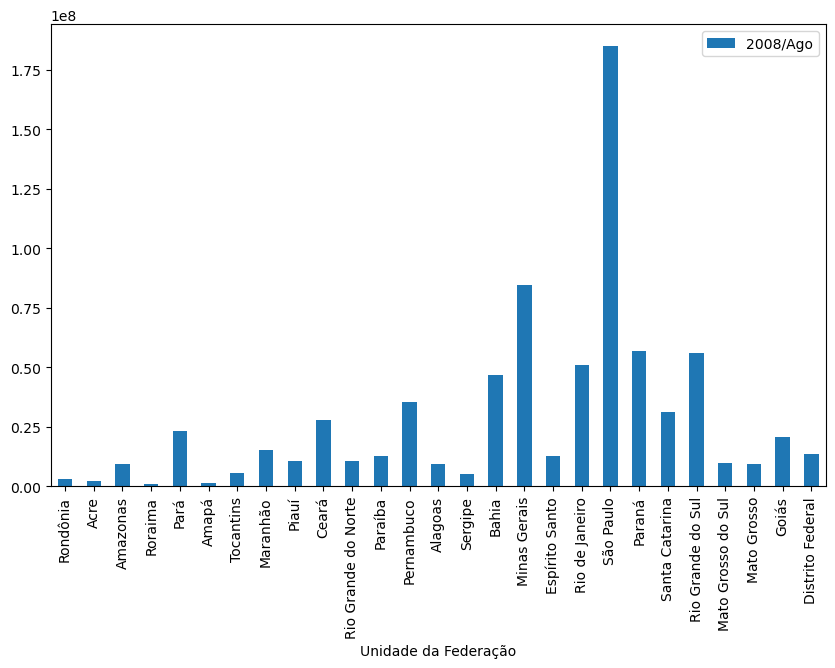

In [ ]:
# Plotando gráfico no estilo 'bar' 
df_pro_cleaned.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,6));




2. Trabalhando com os eixos para melhorar a escala de valores de `2008/Ago`

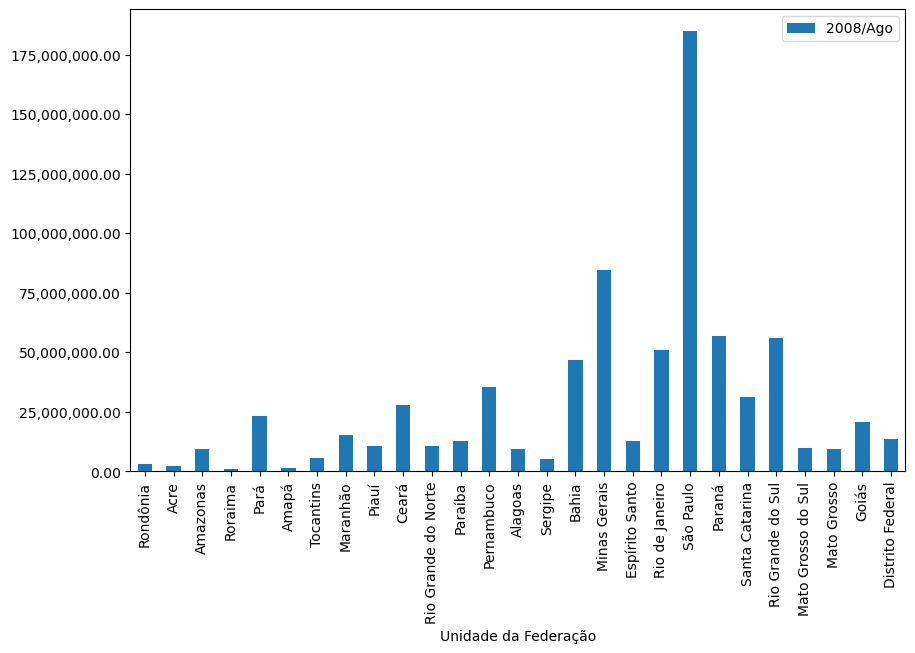

In [ ]:
#configuando eixo y para melhorar escala de valores
axis = df_pro_cleaned.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))


#### 2.2. Desafios

1. Desafio 01: Plotar o gráico acima para o mês mais recente

In [ ]:
# Verificando mês mais recente
df_pro_cleaned.columns[-2]

'2024/Jun'

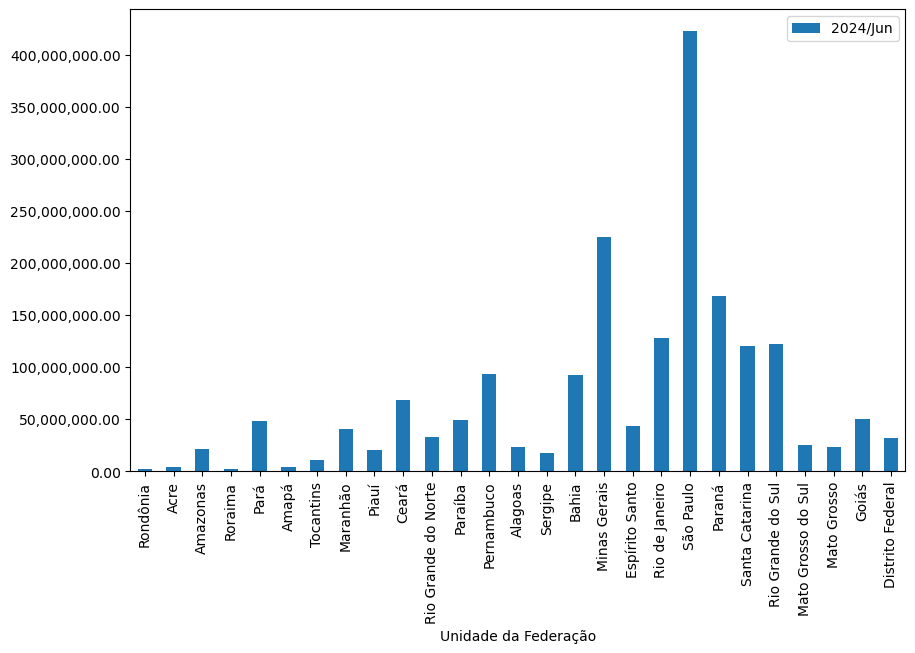

In [ ]:
# Gráfico do mês mais recente
axis = df_pro_cleaned.plot(x='Unidade da Federação', y='2024/Jun', kind='bar', figsize=(10,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

2. Desafio 02: Deixar as legendas dos estados em angulo de 45º

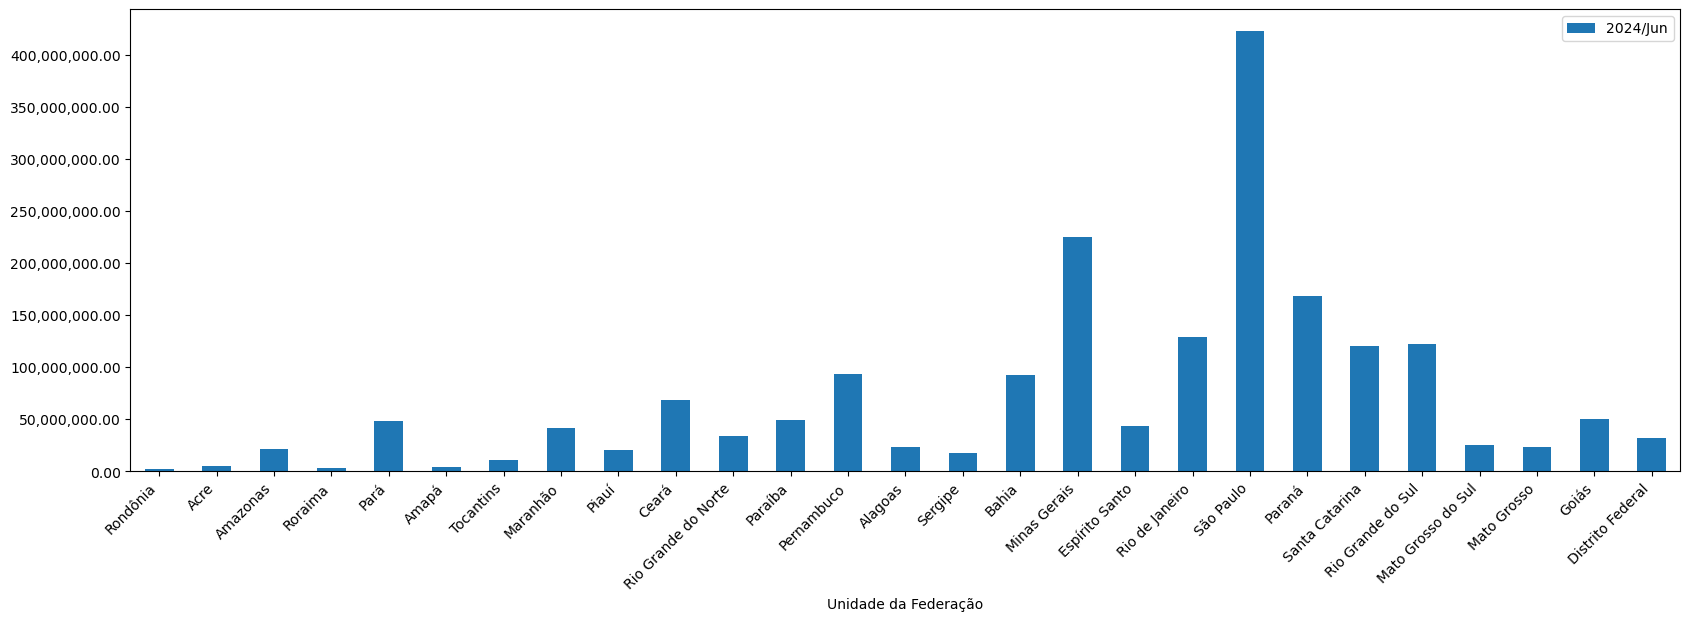

In [ ]:
# Criar o gráfico de barras
axis = df_pro_cleaned.plot(x='Unidade da Federação', y='2024/Jun', kind='bar', figsize=(20,6))

# Formatação do eixo y
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajustar as legendas do eixo x para angulação de 45 graus
plt.xticks(rotation=45, ha='right')  # ha='right' alinha as legendas à direita

# Exibir gráfico
plt.show()


### Resumo

#### Aula 1 - Aquisição, Limpeza e Tratamento de Dados Reais

**Aquisição de Dados:** Iniciei com a aquisição de um conjunto de dados extraído do DATASUS, focado nos valores iniciais liberados para internações hospitalares no Brasil. Aprendi a adaptar esses dados ao padrão brasileiro, garantindo que a legibilidade e a precisão fossem mantidas.

**Verificação e Validação dos Dados:** Realizei uma exploração inicial para entender a estrutura do dataset, identificar variáveis e validar a consistência dos dados. Isso incluiu a verificação de valores ausentes, duplicados e a geração de estatísticas descritivas para identificar padrões e outliers.

**Tratamento de Dados (ETL):** Apliquei o processo de ETL (Extract, Transform, Load) aos dados, o que incluiu a criação de cópias de segurança, limpeza de valores categóricos e correção de valores quantitaivos ausentes. Este processo foi essencial para assegurar que a análise fosse realizada sobre dados de alta qualidade.

#### Aula 2 - Primeiras Visualizações de Dados

**Visualização de Dados:** Fui introduzido às técnicas de visualização, onde criei gráficos de barras para visualizar os valores por Unidade da Federação. Isso me permitiu analisar visualmente os dados para entender distribuições, padrões e anomalias.

**Desafios Práticos:** Realizei desafios práticos que envolveram a plotagem de gráficos para o mês mais recente e o ajuste das legendas das Unidades da Federação para melhorar a legibilidade.

#### Habilidades Desenvolvidas

**Manipulação e Análise de Dados:** Proficiência no uso de Pandas e Numpy para manipulação e análise de dados.

**Processo de ETL:** Experiência prática em extração, transformação e carregamento de dados, garantindo a qualidade dos dados para análise.

**Visualização de Dados:** Habilidade em criar visualizações claras e informativas utilizando Matplotlib.

